# Preparação de estado geral em função de $\theta$

$$|\psi\rangle = \cos(\theta/2)|0\rangle+e^{i\phi}\sin(\theta/2)|1\rangle$$

Asssim, vamos usar a função init_state_gen_state($\theta$,$\phi$) para gerar gerar um estado puro (target_vector) e seu operador densidade (target_op).

In [6]:
from src.tools import *
theta = 0
phi = 0 
target_vector, target_op = init_state_gen_state(theta,phi)

Definimos o circuito quântico (Pennylane) e iniciamos os parâmetros com a função abaixo:

In [7]:
circuit, params = vqa_gen_state(1)


Com a proxima função train(épocas, circuito, parametros, operador de medida) obtemos os parâmetros atualizados e um vetor contendo a fidelidade para cada epoca de treino.

In [8]:
best_params, f = train(25, circuit, params, target_op)

0 0.18045902252197266
1 0.1019754409790039
2 0.031937599182128906
3 0.016366004943847656
4 0.0016031265258789062
5 0.00021457672119140625
6 9.5367431640625e-07
7 9.5367431640625e-07
8 4.673004150390625e-05
9 0.000244140625
10 0.0009765625
11 0.0018463134765625
12 0.0010385513305664062
13 0.0028848648071289062
14 0.004540443420410156
15 0.003208160400390625
16 0.0022897720336914062
17 0.0026788711547851562
18 0.004673004150390625
19 0.0028848648071289062
20 0.002384185791015625
21 0.001102447509765625
22 0.0005044937133789062
23 0.0010385513305664062
24 0.0005044937133789062
24 0.0005044937133789062


Com a proxima função plotamos as fidelidades

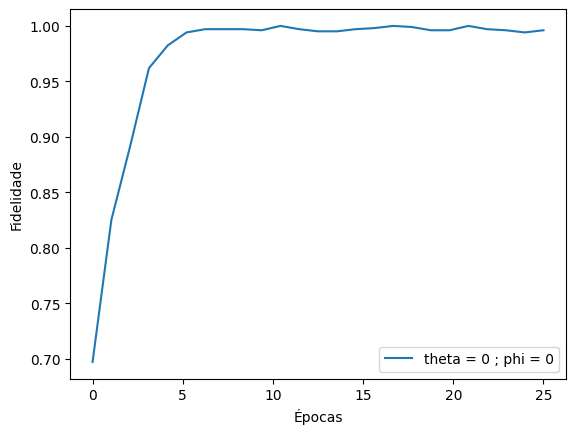

In [10]:
x = np.linspace(0,len(f),len(f))
id = f'theta = {theta} ; phi = {phi}'

plt.plot(x,f,label=id)
plt.ylabel('Fidelidade')
plt.xlabel('Épocas')
plt.legend()
plt.show()

In [3]:
import numpy as np
interval = np.linspace(0,np.pi/2,11)

0 0.13843631744384766
1 0.040863990783691406
2 0.012177467346191406
3 0.0016031265258789062
4 7.724761962890625e-05
5 9.5367431640625e-07
6 4.673004150390625e-05
7 0.00054931640625
8 0.001682281494140625
9 0.002017974853515625
10 0.0035486221313476562
11 0.0044097900390625
12 0.007554054260253906
13 0.005364418029785156
14 0.010514259338378906
15 0.007218360900878906
16 0.004673004150390625
17 0.00390625
18 0.0025787353515625
19 0.0009765625
20 0.00042057037353515625
21 0.00011539459228515625
22 1.52587890625e-05
23 1.52587890625e-05
24 3.814697265625e-06
25 8.58306884765625e-06
26 2.384185791015625e-05
27 4.673004150390625e-05
28 0.000308990478515625
29 0.000644683837890625
30 0.00034427642822265625
31 0.0001373291015625
32 0.00016117095947265625
33 0.000461578369140625
34 0.00027561187744140625
35 0.0003814697265625
36 0.00042057037353515625
37 0.000244140625
38 0.0001373291015625
39 0.00042057037353515625
40 0.00011539459228515625
41 0.0001373291015625
42 9.5367431640625e-05
43 1.52

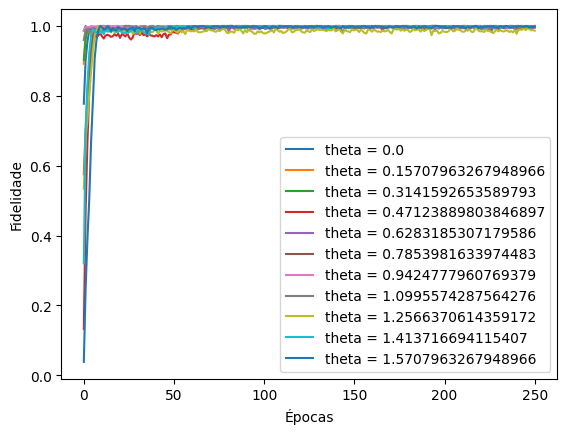

In [4]:
from src.tools import *
#pis = np.linspace(0,np.pi/2,np.pi/2)
for val in interval:
    n_qubits = 1
    circuit, params = vqa_gen_state(n_qubits)
    target_vector, target_op = init_state_gen_state(val,0)
    best_params, f = train(250, circuit, params, target_op)
    x = np.linspace(0,len(f),len(f))
    id = f'theta = {val}'
    plt.plot(x,f,label=id)
plt.ylabel('Fidelidade')
plt.xlabel('Épocas')
plt.legend()
plt.show()

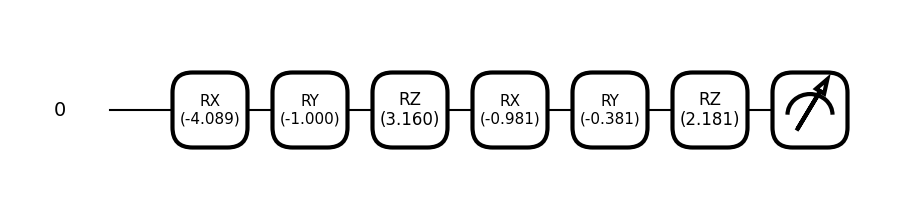

In [1]:
''' CHECK THE SET UP PRINTING THIS CIRCUIT'''
from src.tools import *
def vqa_gen_state(n_qubits, depht=None):
    #n_qubits = 1
    if depht == None:
        depht = n_qubits+1
    n = 3*n_qubits*(1+depht)
    params = random_params(n)
    device = qml.device('qiskit.aer', wires=n_qubits, backend='qasm_simulator')
    @qml.qnode(device, interface="torch")
    def circuit(params, M=None):
        #print(j)
        aux = 0
        for deep in range(0,depht):

            qml.RX(params[0+aux], wires=0)
            qml.RY(params[1+aux], wires=0)
            qml.RZ(params[2+aux], wires=0)
            aux += 3
        return qml.expval(qml.Hermitian(M, wires=0))
    return circuit, params
n_qubits = 1
circuit, params = vqa_gen_state(n_qubits)
target_vector, target_op = init_state_gen_state(np.pi/2,0)
#best_params, f = train(10, circuit, params, target_op)
fig, ax = qml.draw_mpl(circuit, decimals=3)(params, target_op)
plt.show()

In [2]:
def train(epocas, circuit, params, target_op):
    opt = torch.optim.Adam([params], lr=0.1)
    best_loss = 1*cost(circuit, params, target_op)
    best_params = 1*params
    f=[]
    for epoch in range(epocas):
        opt.zero_grad()
        loss = cost(circuit, params, target_op)
        print(epoch, loss.item())
        loss.backward()
        opt.step()
        if loss < best_loss:
            best_loss = 1*loss
            best_params = 1*params
        f.append(fidelidade(circuit, best_params, target_op))
    print(epoch, loss.item())
    return best_params, f


In [ ]:
best_params, f = train(10, circuit, params, target_op)
